In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
nbapset = pd.read_csv("nbaprocessed.csv")
print(nbapset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     16304 non-null  int64  
 1   Year           16304 non-null  int64  
 2   Player         16304 non-null  object 
 3   Tm             16304 non-null  object 
 4   G              16304 non-null  float64
 5   PER            16304 non-null  float64
 6    Salary        16304 non-null  float64
 7   MP             16304 non-null  float64
 8   3P             16304 non-null  float64
 9   2P             16304 non-null  float64
 10  FT             16304 non-null  float64
 11  TRB            16304 non-null  float64
 12  AST            16304 non-null  float64
 13  STL            16304 non-null  float64
 14  BLK            16304 non-null  float64
 15  TOV            16304 non-null  float64
 16  PF             16304 non-null  float64
 17  PTS            16304 non-null  float64
 18  Archet

In [3]:
nbapset.drop(columns = nbapset.columns[0], axis = 1, inplace = True)
print(nbapset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           16304 non-null  int64  
 1   Player         16304 non-null  object 
 2   Tm             16304 non-null  object 
 3   G              16304 non-null  float64
 4   PER            16304 non-null  float64
 5    Salary        16304 non-null  float64
 6   MP             16304 non-null  float64
 7   3P             16304 non-null  float64
 8   2P             16304 non-null  float64
 9   FT             16304 non-null  float64
 10  TRB            16304 non-null  float64
 11  AST            16304 non-null  float64
 12  STL            16304 non-null  float64
 13  BLK            16304 non-null  float64
 14  TOV            16304 non-null  float64
 15  PF             16304 non-null  float64
 16  PTS            16304 non-null  float64
 17  Archetype      16304 non-null  object 
 18  Pos_C 

In [4]:
Xp = nbapset.drop( columns = ["Year","Player","Tm","Archetype"], axis = 1)
yp = nbapset[["Archetype"]]
print(Xp.info(), yp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   G              16304 non-null  float64
 1   PER            16304 non-null  float64
 2    Salary        16304 non-null  float64
 3   MP             16304 non-null  float64
 4   3P             16304 non-null  float64
 5   2P             16304 non-null  float64
 6   FT             16304 non-null  float64
 7   TRB            16304 non-null  float64
 8   AST            16304 non-null  float64
 9   STL            16304 non-null  float64
 10  BLK            16304 non-null  float64
 11  TOV            16304 non-null  float64
 12  PF             16304 non-null  float64
 13  PTS            16304 non-null  float64
 14  Pos_C          16304 non-null  int64  
 15  Pos_PF         16304 non-null  int64  
 16  Pos_PG         16304 non-null  int64  
 17  Pos_SF         16304 non-null  int64  
 18  Pos_SG

In [5]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(Xp, yp, test_size = 0.25, random_state = 42)

In [6]:
print(Xp_train.shape, Xp_test.shape, yp_train.shape, yp_test.shape)

(12228, 23) (4076, 23) (12228, 1) (4076, 1)


In [7]:
knn = KNeighborsClassifier(metric = "minkowski")
k_number = list(range(2,51))
print(k_number)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [8]:
param_grid = {
    "n_neighbors" : k_number,
    "p" : [1,2],
    "weights" : ["uniform","distance"]
}
print(param_grid)

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'p': [1, 2], 'weights': ['uniform', 'distance']}


In [9]:
scorers = ["accuracy","precision_weighted","recall_weighted","f1_weighted"]
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy", verbose = 1, n_jobs = -1)
grid_search = grid.fit(Xp_train, yp_train)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


C:\Users\Furkan Yasin sahın\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [10]:
print(grid_search.best_params_)

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}


In [11]:
print("Accuracy of optimum model:", grid_search.best_score_)

Accuracy of optimum model: 0.8869809154329257


In [12]:
from sklearn.model_selection import cross_validate
knum = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
listlength = len(knum)
print(listlength)
i = 0
acc = []

17


In [13]:
while (i<listlength):
    knntest = KNeighborsClassifier(n_neighbors = knum[i], metric = "minkowski", p = 1, weights = "distance")
    cvtest = cross_validate(knntest, Xp_train, yp_train, scoring = scorers, cv = 10, n_jobs = -1)
    acc.append(cvtest["test_accuracy"].mean())
    i+=1    

Text(0, 0.5, 'Accuracy')

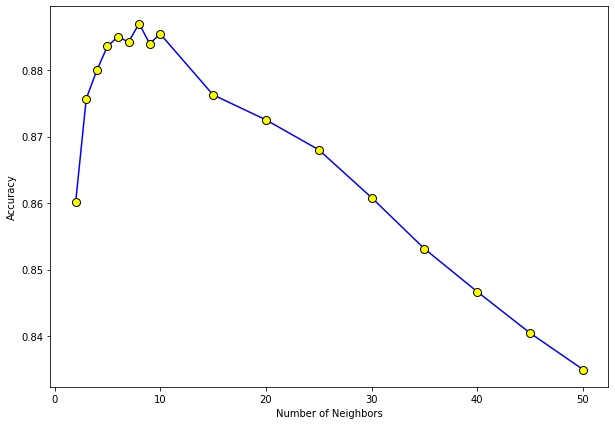

In [14]:
plt.figure(figsize = (10,7))
plt.plot(knum, acc, marker = "o", color = "blue", mec = "black", mfc = "yellow", ms = 8)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

In [15]:
print(np.array(acc).max())

0.8869809154329257


In [16]:
knnp = KNeighborsClassifier(n_neighbors = 8, metric = "minkowski", p = 1, weights = "distance")
knnp = knnp.fit(Xp_train, yp_train)
ypred = knnp.predict(Xp_test)

C:\Users\Furkan Yasin sahın\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:>

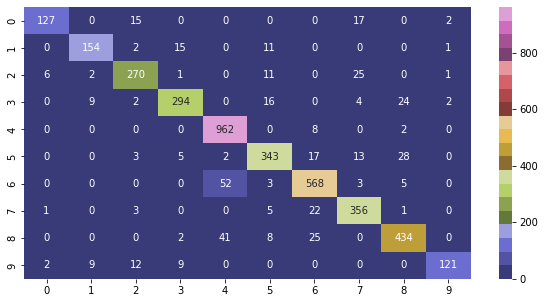

In [17]:
cm = confusion_matrix(yp_test, ypred)
plt.figure(figsize = (10,5))
sns.heatmap(cm, annot = True, cmap ="tab20b", fmt = "d")

In [18]:
print(classification_report(yp_test, ypred))

                       precision    recall  f1-score   support

     All Star Big Man       0.93      0.79      0.86       161
   All Star Playmaker       0.89      0.84      0.86       183
 All Star Post Scorer       0.88      0.85      0.87       316
All Star Sharpshooter       0.90      0.84      0.87       351
            Ignorance       0.91      0.99      0.95       972
            Playmaker       0.86      0.83      0.85       411
          Post Scorer       0.89      0.90      0.89       631
        Rim Protector       0.85      0.92      0.88       388
         Sharpshooter       0.88      0.85      0.86       510
            Superstar       0.95      0.79      0.86       153

             accuracy                           0.89      4076
            macro avg       0.89      0.86      0.88      4076
         weighted avg       0.89      0.89      0.89      4076



In [19]:
nbafset = pd.read_csv("nbafeatset.csv")
print(nbafset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16304 non-null  int64  
 1    Salary     16304 non-null  float64
 2   MP          16304 non-null  float64
 3   3P          16304 non-null  float64
 4   FT          16304 non-null  float64
 5   TRB         16304 non-null  float64
 6   AST         16304 non-null  float64
 7   STL         16304 non-null  float64
 8   BLK         16304 non-null  float64
 9   TOV         16304 non-null  float64
 10  PF          16304 non-null  float64
 11  PTS         16304 non-null  float64
 12  Archetype   16304 non-null  object 
dtypes: float64(11), int64(1), object(1)
memory usage: 1.6+ MB
None


In [20]:
nbafset.drop(columns = nbafset.columns[0], axis = 1, inplace = True)

In [21]:
Xf = nbafset.drop(columns = "Archetype", axis = 1)
yf = nbafset[["Archetype"]]

In [22]:
print(Xf.info(), yf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    Salary   16304 non-null  float64
 1   MP        16304 non-null  float64
 2   3P        16304 non-null  float64
 3   FT        16304 non-null  float64
 4   TRB       16304 non-null  float64
 5   AST       16304 non-null  float64
 6   STL       16304 non-null  float64
 7   BLK       16304 non-null  float64
 8   TOV       16304 non-null  float64
 9   PF        16304 non-null  float64
 10  PTS       16304 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16304 entries, 0 to 16303
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Archetype  16304 non-null  object
dtypes: object(1)
memory usage: 127.5+ KB
None None


In [23]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.25, random_state = 42)

In [24]:
print(Xf_train.shape, Xf_test.shape, yf_train.shape, yf_test.shape)

(12228, 11) (4076, 11) (12228, 1) (4076, 1)


In [25]:
knnf = KNeighborsClassifier(metric = "minkowski")
gridf = GridSearchCV(knnf, param_grid, cv = 10, scoring = "accuracy", verbose = 1, n_jobs = -1)
grid_search_f = gridf.fit(Xf_train, yf_train)

Fitting 10 folds for each of 196 candidates, totalling 1960 fits


C:\Users\Furkan Yasin sahın\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [26]:
print(grid_search_f.best_params_)

{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


In [27]:
print("Accuracy of optimum model:", grid_search_f.best_score_)

Accuracy of optimum model: 0.9551036931266921


In [34]:
accf = []
i=0
while (i<listlength):
    knnf = KNeighborsClassifier(n_neighbors = knum[i], metric = "minkowski", p = 2, weights = "distance")
    cvfscore = cross_validate(knnf, Xf_train, yf_train, scoring = scorers , cv = 10, n_jobs = -1)
    accf.append(cvfscore["test_accuracy"].mean())
    i+=1

In [36]:
print(np.array(accf).max())

0.9551036931266921


Text(0, 0.5, 'Accuracy')

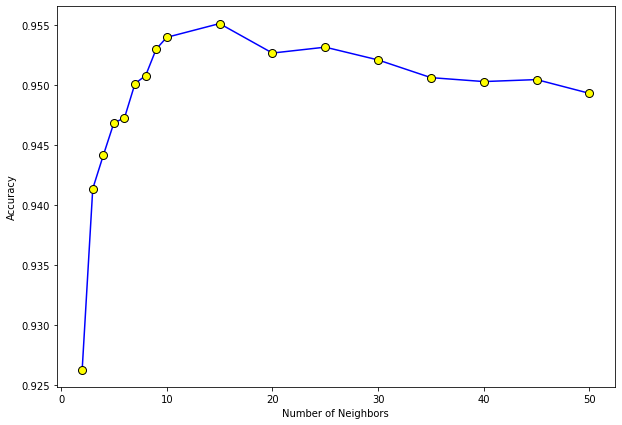

In [37]:
plt.figure(figsize=(10,7))
plt.plot(knum, accf, marker = "o", color = "blue", mec = "black", mfc = "yellow", ms = 8)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

In [38]:
knnfset = KNeighborsClassifier(n_neighbors = 15, metric = "minkowski", p = 2, weights = "distance")
knnfset = knnfset.fit(Xf_train, yf_train)
yfpred = knnfset.predict(Xf_test)

C:\Users\Furkan Yasin sahın\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<AxesSubplot:>

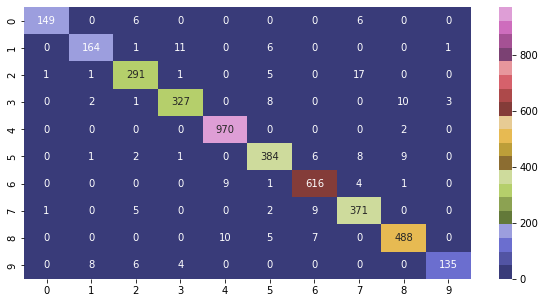

In [42]:
fcm = confusion_matrix(yf_test, yfpred)
plt.figure(figsize = (10,5))
sns.heatmap(fcm, annot = True, cmap = "tab20b", fmt = "d")

In [41]:
print(classification_report(yf_test, yfpred))

                       precision    recall  f1-score   support

     All Star Big Man       0.99      0.93      0.96       161
   All Star Playmaker       0.93      0.90      0.91       183
 All Star Post Scorer       0.93      0.92      0.93       316
All Star Sharpshooter       0.95      0.93      0.94       351
            Ignorance       0.98      1.00      0.99       972
            Playmaker       0.93      0.93      0.93       411
          Post Scorer       0.97      0.98      0.97       631
        Rim Protector       0.91      0.96      0.93       388
         Sharpshooter       0.96      0.96      0.96       510
            Superstar       0.97      0.88      0.92       153

             accuracy                           0.96      4076
            macro avg       0.95      0.94      0.94      4076
         weighted avg       0.96      0.96      0.96      4076

